In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math

## Изучение данных из файлов

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
display(df_calls)
df_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
display(df_internet)
df_internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [4]:
df_messages = pd.read_csv('/datasets/messages.csv')
display(df_messages)
df_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [5]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
df_users = pd.read_csv('/datasets/users.csv')
display(df_users)
df_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пока данные выглядят более менее в порядке. Пропуски есть только в таблице 'users', в столбце 'churn_date' - дата прекращения пользования тарифом. Но если там нет данных, значит пользователь не прекратил пользоваться тарифом, и является активным пользователем. Это не критичные пропуски, их заполнять не будем.

## Предобработка данных


###  Обработка пропусков

Проверим пропуски, вдруг где-то они есть

In [7]:
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [8]:
df_internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [9]:
df_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [10]:
df_tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [11]:
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Пропусков нет нигде, кроме столбца с датой прекращения пользования тарифом в таблице. Пропуск - значит пользователь не прекратил пользоваться тарифом, и является активным пользователем. Это не критичнеы пропуски, их заполнять не будем.

###  Обработка дубликатов

In [12]:
df_calls.duplicated().sum()

0

In [13]:
df_internet.duplicated().sum()

0

In [14]:
df_messages.duplicated().sum()

0

In [15]:
df_tariffs.duplicated().sum()

0

In [16]:
df_users.duplicated().sum()

0

Дубликатов нет.

###  Замена типа данных

Округлим секунды до минут, а мегабайты — до гигабайт

In [17]:
df_calls['duration'] = [math.ceil(i) for i in df_calls['duration']] #окгруглим к большему минуты звонков
df_internet['mb_used'] = [math.ceil(i) for i in df_internet['mb_used']] #округлим гб в большую сторону

Т.к. у нас данные только за 2018 год, переведем данные в столбце с датой только к месяцу, чтобы удобней было группировать данные

In [18]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

In [19]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [20]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

## Расчёты дополнительных параметров

### Количество израсходованных минут по месяцам для каждого пользователя

In [21]:
#код ревьюера
df_calls_sum = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum']).reset_index()
df_calls_sum.columns = ['user_id', 'month', 'calls']
df_calls_sum = df_calls_sum.merge(df_users[['user_id', 'tariff']], on='user_id')
df_calls_sum

,user_id,month,calls,tariff
0,1000,5,159,ultra
1,1000,6,172,ultra
2,1000,7,340,ultra
3,1000,8,408,ultra
4,1000,9,466,ultra
...,...,...,...,...
3169,1498,10,247,smart
3170,1499,9,70,smart
3171,1499,10,449,smart
3172,1499,11,612,smart


### Количество звонков по месяцам для каждого пользователя


In [22]:
df_calls_count = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count']).reset_index()
df_calls_count.columns = ['user_id', 'month', 'calls']
df_calls_count=df_calls_count.merge(df_users[['user_id', 'tariff']], on='user_id')
df_calls_count

,user_id,month,calls,tariff
0,1000,5,22,ultra
1,1000,6,43,ultra
2,1000,7,47,ultra
3,1000,8,52,ultra
4,1000,9,58,ultra
...,...,...,...,...
3169,1498,10,41,smart
3170,1499,9,9,smart
3171,1499,10,68,smart
3172,1499,11,74,smart


### Количество израсходованных гб по месяцам для каждого пользователя


In [23]:
df_internet_count = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum']).reset_index()
df_internet_count.columns = ['user_id', 'month', 'gb_used']
df_internet_count = df_internet_count.merge(df_users[['user_id', 'tariff']], on='user_id')
df_internet_count['gb_used'] = df_internet_count['gb_used']/1024 #переведем мб в гб
df_internet_count['gb_used'] = [math.ceil(i) for i in df_internet_count['gb_used']]
df_internet_count

,user_id,month,gb_used,tariff
0,1000,5,3,ultra
1,1000,6,23,ultra
2,1000,7,14,ultra
3,1000,8,14,ultra
4,1000,9,15,ultra
...,...,...,...,...
3198,1498,10,21,smart
3199,1499,9,2,smart
3200,1499,10,18,smart
3201,1499,11,18,smart


### Количество отправленных сообщений по месяцам для каждого пользователя


In [24]:
df_messages_count = df_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc=['count']).reset_index()
df_messages_count.columns = ['user_id', 'month', 'messages']
df_messages_count = df_messages_count.merge(df_users[['user_id', 'tariff']], on='user_id')
df_messages_count

,user_id,month,messages,tariff
0,1000,5,22,ultra
1,1000,6,60,ultra
2,1000,7,75,ultra
3,1000,8,81,ultra
4,1000,9,57,ultra
...,...,...,...,...
2712,1498,10,42,smart
2713,1499,9,11,smart
2714,1499,10,48,smart
2715,1499,11,59,smart


###  Рассчет выручки по месяцам

Описание тарифов

Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

Объединяю таблицы с информацие о смс, звонках, интернете

In [25]:
calls_mess = df_calls_sum.merge(df_messages_count, how='outer')
calls_mess_int = calls_mess.merge(df_internet_count, how='outer')
calls_mess_int

,user_id,month,calls,tariff,messages,gb_used
0,1000,5,159.0,ultra,22.0,3.0
1,1000,6,172.0,ultra,60.0,23.0
2,1000,7,340.0,ultra,75.0,14.0
3,1000,8,408.0,ultra,81.0,14.0
4,1000,9,466.0,ultra,57.0,15.0
...,...,...,...,...,...,...
3209,1489,9,NaN,smart,32.0,17.0
3210,1489,10,NaN,smart,21.0,20.0
3211,1489,11,NaN,smart,20.0,18.0
3212,1489,12,NaN,smart,35.0,17.0


Объединяю с таблицей users

In [26]:
df_users = df_users.merge(calls_mess_int, how='left').reset_index(drop=True)
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls,messages,gb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,3.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,60.0,23.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,75.0,14.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,81.0,14.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,57.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,42.0,21.0
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,11.0,2.0
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,48.0,18.0
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,59.0,18.0


In [27]:
def money_calls(row, col):
    if 'ultra' in row['tariff']:
        minuts=3000
        rub_for_minut=1
        price=1950
        if row[col] ==0:
            return 0
        elif row[col]>minuts:
            full_price = (row[col] - minuts)*rub_for_minut+price
        else:
            full_price=price
        return full_price
    if 'smart' in row['tariff']:
        minuts=500
        rub_for_minut=3
        price=550
        if row[col] ==0:
            return 0
        elif row[col]>minuts:
            full_price = (row[col] - minuts)*rub_for_minut+price
        else:
            full_price = price
        return full_price
df_users['money_calls'] = df_users.apply(lambda x: money_calls(x, 'calls'), axis=1)

In [28]:
def money_messege(row, col):
    if 'ultra' in row['tariff']:
        messeges=1000
        one_message=1
        price=0
        if row[col] ==0:
            return 0
        elif row[col]>messeges:
            full_price = (row[col] - messeges)*one_message+price
        else:
            full_price=price
        return full_price
    if 'smart' in row['tariff']:
        messeges=50
        one_message=3
        price=0
        if row[col] ==0:
            return 0
        elif row[col]>messeges:
            full_price = (row[col] - messeges)*one_message+price
        else:
            full_price = price
        return full_price
df_users['money_messege'] = df_users.apply(lambda x: money_messege(x, 'messages'), axis=1)

In [29]:
def money_internet(row, col):
    if 'ultra' in row['tariff']:
        gb=30
        one_gb=150
        price=0
        if row[col] ==0:
            return 0
        elif row[col]>gb:
            full_price = (row[col] - gb)*one_gb+price
        else:
            full_price=price
        return full_price
    if 'smart' in row['tariff']:
        gb=15
        one_gb=200
        price=0
        if row[col] ==0:
            return 0
        elif row[col]>gb:
            full_price = (row[col] - gb)*one_gb+price
        else:
            full_price = price
        return full_price
df_users['money_internet'] = df_users.apply(lambda x: money_internet(x, 'gb_used'), axis=1)
df_users['all_money'] = df_users['money_internet'] + df_users['money_messege']+ df_users['money_calls']

In [30]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls,messages,gb_used,money_calls,money_messege,money_internet,all_money
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,3.0,1950.0,0.0,0.0,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,60.0,23.0,1950.0,0.0,0.0,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,75.0,14.0,1950.0,0.0,0.0,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,81.0,14.0,1950.0,0.0,0.0,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,57.0,15.0,1950.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,42.0,21.0,550.0,0.0,1200.0,1750.0
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,11.0,2.0,550.0,0.0,0.0,550.0
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,48.0,18.0,550.0,0.0,600.0,1150.0
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,59.0,18.0,886.0,27.0,600.0,1513.0


Для удобвства, разделим пользователей по тарифам


In [31]:
smart_users = df_users[df_users['tariff']=='smart'] #пользователи тарифа смарт
ultra_users = df_users[df_users['tariff']=='ultra'] #пользователи тарифа ультра

## Анализ Данных

Количество минут разговора

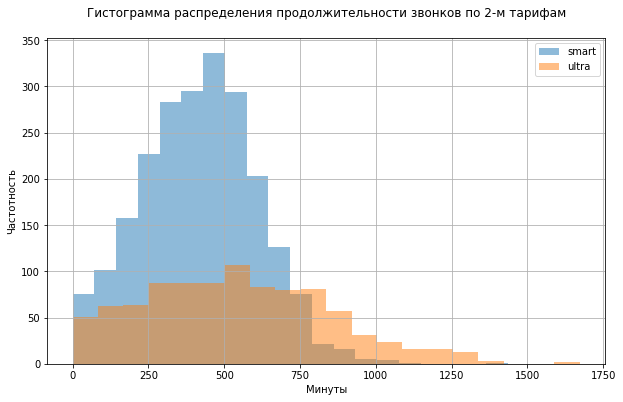

In [32]:
df_calls_sum_smart = df_calls_sum[df_calls_sum['tariff']=='smart']
df_calls_sum_ultra = df_calls_sum[df_calls_sum['tariff']=='ultra']
plt.figure(figsize=(10, 6))
h1 = df_calls_sum_smart['calls'].hist(bins=20, alpha=0.5)
h2 = df_calls_sum_ultra['calls'].hist(bins=20, alpha=0.5)
plt.title('Гистограмма распределения продолжительности звонков по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])
plt.show()

In [33]:
x1 = np.var(df_calls_sum_smart['calls'], ddof=1) #дисперсия тарифа смарт
x2 = df_calls_sum_smart['calls'].mean() #среднее тарифа смарт
x3 = np.std(df_calls_sum_smart['calls'], ddof=1) #стандартное отклонение тарифа смарт
x4 = np.var(df_calls_sum_ultra['calls'], ddof=1) #дисперсия тарифа ультра
x5 = df_calls_sum_ultra['calls'].mean() #среднее тарифа ультра
x6 = np.std(df_calls_sum_ultra['calls'], ddof=1) #стандартное отклонение тарифа ультра

In [34]:
pd.DataFrame(data=[['smart', x1, x2, x3], ['ultra', x4, x5, x6]], columns=['tariff', 'var', 'mean', 'std'])

,tariff,var,mean,std
0,smart,35844.189551,419.062978,189.325618
1,ultra,94203.418396,545.451104,306.925754


Пользователи тарифа "Ультра" используют больше минут, чем пользователи тарифа "Смарт". И стандартное отклонение у тарифа "Ультра" больше, значит что разброс данных больше.

Количество СМС в месяц

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


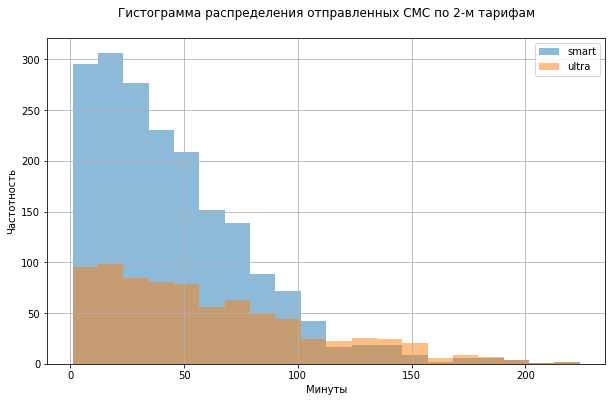

In [35]:
df_messages_count_smart = df_messages_count[df_calls_sum['tariff']=='smart']
df_messages_count_ultra = df_messages_count[df_messages_count['tariff']=='ultra']
plt.figure(figsize=(10, 6))
h3 = df_messages_count_smart['messages'].hist(bins=20, alpha=0.5)
h4 = df_messages_count_ultra['messages'].hist(bins=20, alpha=0.5)
plt.title('Гистограмма распределения отправленных СМС по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])
plt.show()

In [36]:
x7 = np.var(df_messages_count_smart['messages'], ddof=1) #дисперсия тарифа смарт
x8 = df_messages_count_smart['messages'].mean() #срднее тарифа смарт
x9 = np.std(df_messages_count_smart['messages'], ddof=1) #стандартное отклонение тарифа смарт
x10 = np.var(df_messages_count_ultra['messages'], ddof=1) #дисперсия тарифа сультра
x11 = df_messages_count_ultra['messages'].mean() #среднее тарифа ультра
x12 = np.std(df_messages_count_ultra['messages'], ddof=1) #стандартное отклонение тарифа ультра
pd.DataFrame(data=[['smart', x7, x8, x9], ['ultra', x10, x11, x12]], columns=['tariff', 'var', 'mean', 'std'])

,tariff,var,mean,std
0,smart,1225.402881,45.324011,35.005755
1,ultra,2109.659183,61.161006,45.931026


Среднее тарифа "Ультра" так же больше, чем у "Смарт". Значит, что в среднем пользователи этого тарифа отправляют больше смс. Распределения у них очень похожи, и стандартные отклонения близки друг к другу. Распределение Пуассона в обоих случаях. По отправке смс пользователи обоих тарифов похожи

Объем трафика за месяц

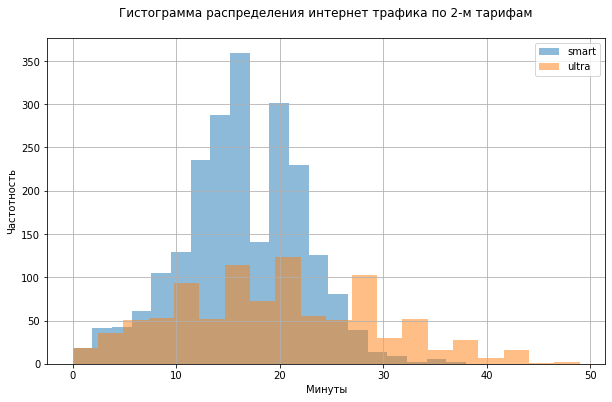

In [37]:
df_internet_count_ultra = df_internet_count[df_internet_count['tariff']=='ultra']
df_internet_count_smart = df_internet_count[df_internet_count['tariff']=='smart']
plt.figure(figsize=(10, 6))
h5 = df_internet_count_smart['gb_used'].hist(bins=20, alpha=0.5)
h6 = df_internet_count_ultra['gb_used'].hist(bins=20, alpha=0.5)
plt.title('Гистограмма распределения интернет трафика по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])
plt.show()

In [38]:
x13 = np.var(df_internet_count_smart['gb_used'], ddof=1) #дисперсия тарифа смарт
x14 = df_internet_count_smart['gb_used'].mean() #среднее тарифа смарт
x15 = np.std(df_internet_count_smart['gb_used'], ddof=1) #стандартное отклонение тарифа смарт
x16 = np.var(df_internet_count_ultra['gb_used'], ddof=1) #дисперсия тарифа ультра
x17 = df_internet_count_ultra['gb_used'].mean() #среднее тарифа ультра
x18 = np.std(df_internet_count_ultra['gb_used'], ddof=1) #стандартное отклонение тарифа ультра
pd.DataFrame(data=[['smart', x13, x14, x15], ['ultra', x16, x17, x18]], columns=['tariff', 'var', 'mean', 'std'])

,tariff,var,mean,std
0,smart,33.054966,16.366697,5.749345
1,ultra,94.379757,19.726154,9.714924


Интернет трафик пользователи обоих тарифов расходуют тоже похоже. По всем графикам видно, что пользователи тарифа "Смарт" расходуют больше трафика, смс и минут разговора но только за счет того, что количество пользователей самого тарифа "Смарт" больше, чем пользователей тарифа "Ультра". Но если бы пользователей обоих тарифов было одинаковое количество, то пользователи тарифа "Ультра", расходовали бы быльше трафика, смс и минут разговора

## Гипотеза 1

Нулевая гипотеза: Средние выручки пользователей тарифов «Ультра» и «Смарт» равны.

In [39]:
alpha = .05
results = st.ttest_ind(ultra_users['all_money'], smart_users['all_money'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза верна')

p-значение:  2.5878439138870128e-154
Отвергаем нулевую гипотезу


Согласно проведенному тесту, гипотеза отвергаетcя

## Гипотеза 2

Нулевая гипотеза: Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Альтренативная гипотеза: Cредняя выручка пользователей из Москвы не равна выручке пользователей из других регионов

In [40]:
msk_money = df_users[df_users['city']=='Москва'] #таблица, где только Москва
another_city_money = df_users[df_users['city']!='Москва'] #таблица для других городов

In [42]:
alpha = .05
result = st.ttest_ind(msk_money['all_money'], another_city_money['all_money'])
print('p-значение: ', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза верна')

p-значение:  0.4686389024041876
Нулевая гипотеза верна


Согласно результату выполенного теста, средняя выручка с Москвы равна средней выручке с других городов. Нулевая гипотеза не опровергнута.

##  Вывод

Мы провели исследование по опредедлению перспективного тарифа для телеком-компании.

Входные данные были чистыми, без пропусков и дубликатов.

После анализа данных, стало видно, что пользователи тарифа "Ультра" тратять больше минут разговора, и отправляют больше смс, чем пользователи тарифа "Смарт". Интернет они расходуют почти одинаково. 

Далее мы приступили к проверке гипотезы : Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны. После проверки гипотезы при помощи t-теста, мы пришли к выводу, что выручка с тарифов различается.

Затем, мы проверили гипотезу о выручке в Москве и других городах, при помощи t-теста. Нулевая гипотеза звучала так: выручка в Москве равна выручке в других городах. Гипотеза не опровернута.

Подводя общий итог, можно сказать, что для комапании «Мегалайн» тариф "Смарт" выгоднее - пользователи в среднем тратят меньше минут разговора и смс, но выручки с них поступает больше, чем с пользователей тарифа "Ультра", потому что пользователей тарифа "Смарт" больше.